<a href="https://colab.research.google.com/github/amitpuri/openagi-codes/blob/main/notebooks/Feedforward_Neural_Network_FNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Baseline Test Accuracy (hidden size=10): 0.9666666666666667
Hidden size: 5, Test Accuracy: 0.73
Hidden size: 10, Test Accuracy: 0.80
Hidden size: 15, Test Accuracy: 0.97
Hidden size: 20, Test Accuracy: 1.00


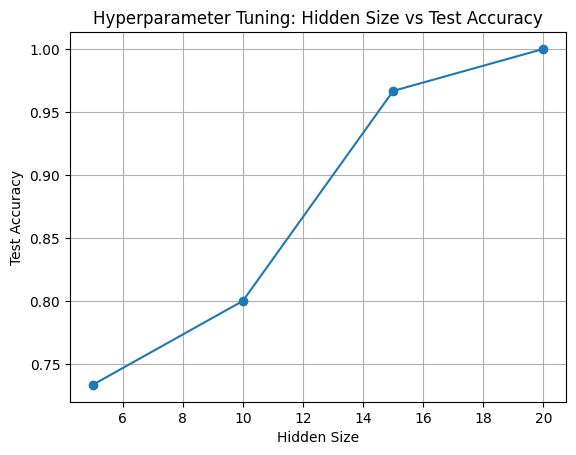

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# 1. Load and preprocess data
data = load_iris()
X = data.data.astype(np.float32)
y = data.target.astype(np.int64)  # Ensure target is in long format for CrossEntropyLoss
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Define the Feedforward Neural Network model
class FNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 3. Train the model with a given hidden size
def train_model(hidden_size):
    model = FNN(4, hidden_size, 3)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    epochs = 50
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(torch.from_numpy(X_train))
        loss = criterion(outputs, torch.from_numpy(y_train))
        loss.backward()
        optimizer.step()
    return model

# Train baseline model with hidden size = 10
baseline_model = train_model(10)

# 4. Evaluate the baseline model on the test set
with torch.no_grad():
    outputs_test = baseline_model(torch.from_numpy(X_test))
    _, predicted = torch.max(outputs_test, 1)
    baseline_accuracy = (predicted.numpy() == y_test).mean()
print("Baseline Test Accuracy (hidden size=10):", baseline_accuracy)

# 5. Hyperparameter Tuning: Vary hidden size and record test accuracy
hidden_sizes = [5, 10, 15, 20]
accuracies = []
for hs in hidden_sizes:
    model = train_model(hs)
    with torch.no_grad():
        outputs_test = model(torch.from_numpy(X_test))
        _, pred = torch.max(outputs_test, 1)
        acc = (pred.numpy() == y_test).mean()
        accuracies.append(acc)
        print(f"Hidden size: {hs}, Test Accuracy: {acc:.2f}")

# 6. Plot Hidden Size vs. Accuracy
plt.figure()
plt.plot(hidden_sizes, accuracies, marker='o', linestyle='-')
plt.xlabel("Hidden Size")
plt.ylabel("Test Accuracy")
plt.title("Hyperparameter Tuning: Hidden Size vs Test Accuracy")
plt.grid(True)
plt.show()
